In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

loan_df = pd.read_csv('Data/Loan_Default.csv')
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [11]:
loan_df["rate_of_interest"].mean()

4.0454758043677765

In [12]:
loan_df[loan_df["rate_of_interest"].isna()]

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1,loan_amt_v_income


In [2]:
#loan_df["income"] = loan_df["income"].fillna(loan_df["income"].mean())
#loan_df["loan_amount"] = loan_df["loan_amount"].fillna(loan_df["loan_amount"].mean())
#loan_df["rate_of_interest"] = loan_df["rate_of_interest"].fillna(loan_df["rate_of_interest"].mean())
#loan_df["approv_in_adv"] = loan_df["approv_in_adv"].fillna(loan_df["approv_in_adv"].mode())



loan_df = loan_df.assign(
    total_units = loan_df["total_units"].map({
        "1U": "1U",
        "2U": "2U+",
        "3U": "2U+",
        "4U": "2U+"}),
    loan_amt_v_income = loan_df["loan_amount"]/loan_df["income"]
)

loan_df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1,loan_amt_v_income
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,4.045476,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0,66.954023
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,4.045476,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN,41.465863
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.560000,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0,42.879747
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.250000,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0,38.425926
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.000000,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0,66.714559


In [3]:
prep_loan_df = loan_df.drop([
    "year", 
     "ID", 
     "open_credit", 
    "construction_type", 
    "Security_Type", 
    "Secured_by"], 
    axis=1
)

prep_loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   loan_limit                 145326 non-null  object 
 1   Gender                     148670 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   business_or_commercial     148670 non-null  object 
 7   loan_amount                148670 non-null  int64  
 8   rate_of_interest           148670 non-null  float64
 9   Interest_rate_spread       112031 non-null  float64
 10  Upfront_charges            109028 non-null  float64
 11  term                       148629 non-null  float64
 12  Neg_ammortization          148549 non-null  object 
 13  interest_only              14

In [7]:
from sklearn.model_selection import train_test_split

features = [
    "loan_amount", 
    "income", 
    "Gender",
    "rate_of_interest",
    "age",
    "lump_sum_payment",
    "credit_type",
    "total_units",
    "Credit_Worthiness",
    "Credit_Score",
    "approv_in_adv", 

]

X = pd.get_dummies(prep_loan_df[features], drop_first=True)
y = prep_loan_df["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=12345)

## Decision Trees

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

print(f"Train Score: {dt.score(X_train, y_train)}")
print(f"Test Score: {dt.score(X_test, y_test)}")

Train Score: 1.0
Test Score: 1.0


In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, dt.predict(X_test))

array([[22345,     0],
       [    0,  7389]], dtype=int64)

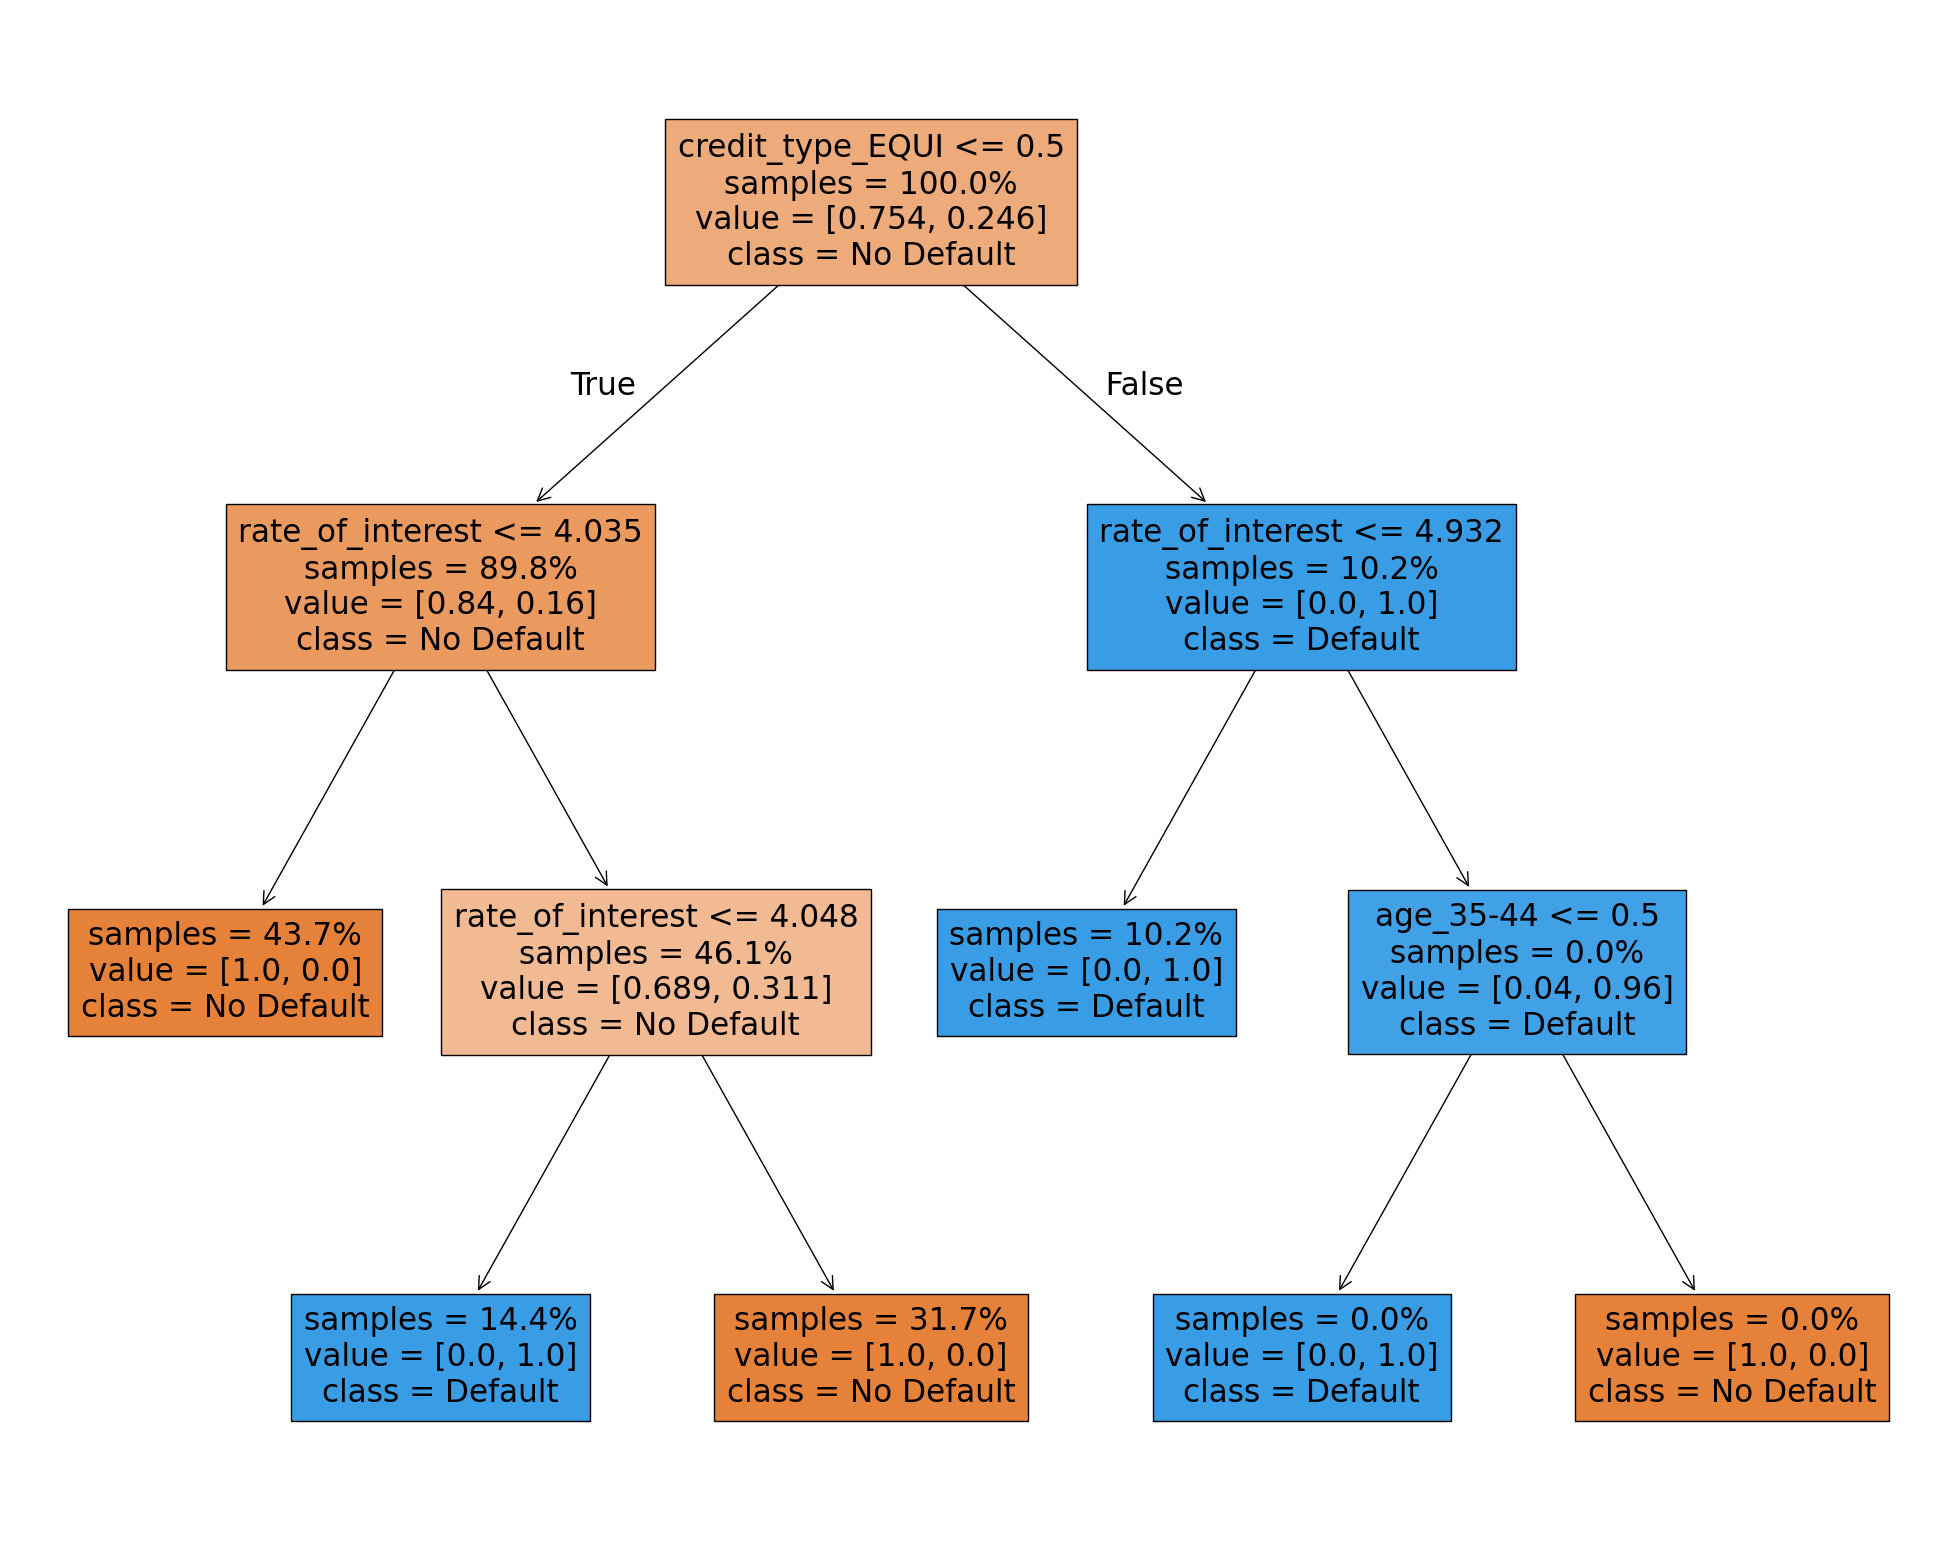

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(25, 20))

plot_tree(
    dt,
    feature_names=list(X_train.columns),
    class_names=['No Default', 'Default'],
    impurity=False,
    proportion=True,
    filled=True
);